In [41]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
path = "Iris.csv"

In [53]:
dataset = pd.read_csv(path)
dataset = dataset.drop(columns = 'Id')
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[12  0  0]
 [ 0 15  0]
 [ 0  3 15]]


In [59]:

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.83      0.91        18

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



In [60]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.9333333333333333


## Observe plots for best accuracy and min error

### min error

Minimum error:- 0.022222222222222223 at K = 4


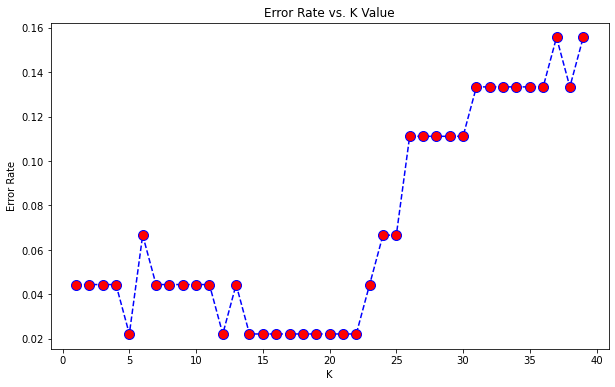

In [61]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [62]:
opt_classifier = KNeighborsClassifier(n_neighbors =error_rate.index(min(error_rate)))
opt_classifier.fit(X_train, y_train)
y_pred = opt_classifier.predict(X_test)
result = confusion_matrix(y_test, y_pred)

y_pred = opt_classifier.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[12  0  0]
 [ 0 15  0]
 [ 0  2 16]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.89      0.94        18

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


### max accuracy

Text(0, 0.5, 'Accuracy')

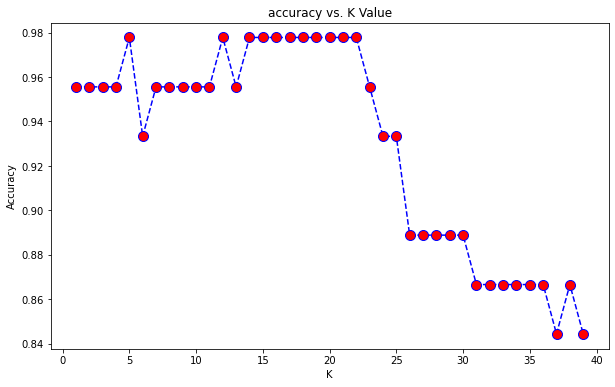

In [63]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [64]:
opt_classifier = KNeighborsClassifier(n_neighbors =acc.index(max(acc)))
opt_classifier.fit(X_train, y_train)
y_pred = opt_classifier.predict(X_test)
result = confusion_matrix(y_test, y_pred)

y_pred = opt_classifier.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[12  0  0]
 [ 0 15  0]
 [ 0  2 16]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.89      0.94        18

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


# Conclusion

Opting with the error rate plot isnt exactly the best strategy as other values varied between a range of perfect accuracy and the chosen K by plot

KNN is a lazy algorythm and is considered extremely fast

Euclidean distance is favourite in clustering algorytms
